In [5]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sbn

%matplotlib inline

In [6]:
data = pd.read_csv("data/data.csv")

In [7]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [8]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [10]:
train, test = train_test_split(data, test_size=0.15)

In [11]:
print(len(train))

1714


In [12]:
print(len(test))

303


In [13]:
red_blue = ['green' , 'red']
palette = sbn.color_palette(red_blue)
sbn.set_palette(palette)
sbn.set_style("white")

In [14]:
pos_tempo = data[data['target'] == 1]['tempo']
neg_tempo = data[data['target'] == 0]['tempo']

pos_dance = data[data['target'] == 1]['danceability']
neg_dance = data[data['target'] == 0]['danceability']

pos_duration = data[data['target'] == 1]['duration_ms']
neg_duration = data[data['target'] == 0]['duration_ms']

pos_loudness = data[data['target'] == 1]['loudness']
neg_loudness = data[data['target'] == 0]['loudness']

pos_speechiness = data[data['target'] == 1]['speechiness']
neg_speechiness = data[data['target'] == 0]['speechiness']

pos_valence = data[data['target'] == 1]['valence']
neg_valence = data[data['target'] == 0]['valence']

pos_energy = data[data['target'] == 1]['energy']
neg_energy = data[data['target'] == 0]['energy']

pos_acousticness = data[data['target'] == 1]['acousticness']
neg_acousticness = data[data['target'] == 0]['acousticness']

pos_key = data[data['target'] == 1]['key']
neg_key = data[data['target'] == 0]['key']

pos_instrumentalness = data[data['target'] == 1]['instrumentalness']
neg_instrumentalness = data[data['target'] == 0]['instrumentalness']

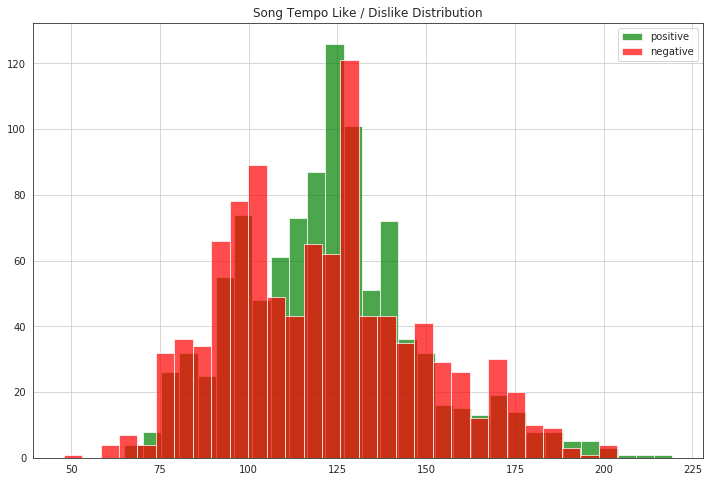

In [15]:
fig = plt.figure(figsize=[12 , 8])
plt.title("Song Tempo Like / Dislike Distribution")
pos_tempo.hist(alpha=0.7, bins=30, label='positive')
neg_tempo.hist(alpha=0.7, bins=30, label='negative')
plt.legend(loc="upper right")

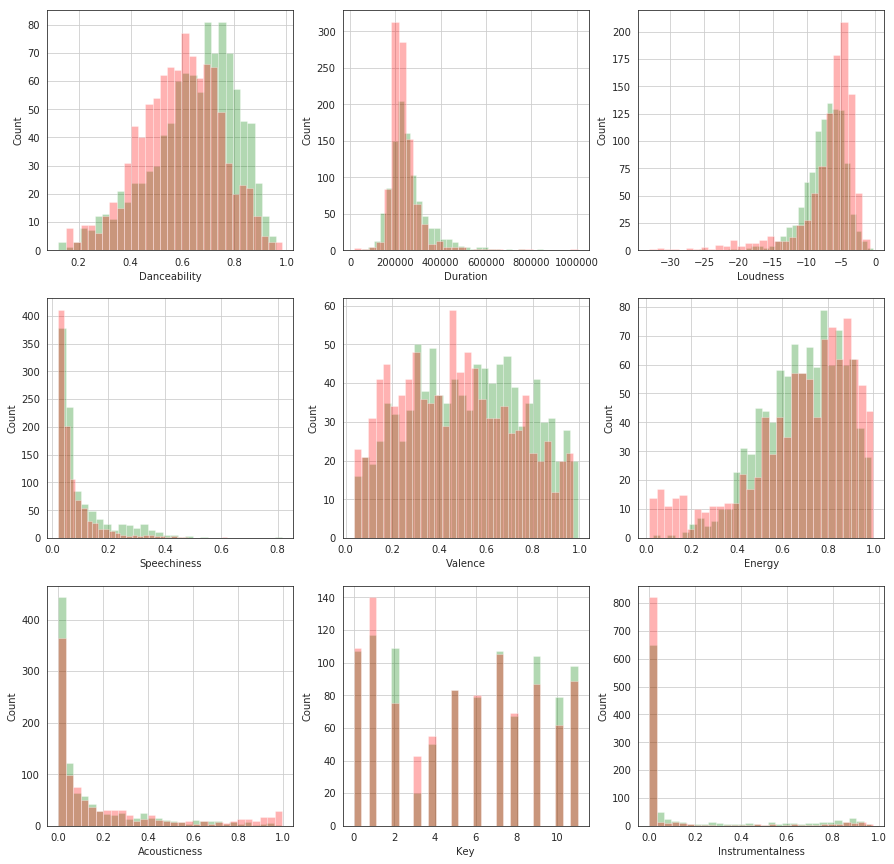

In [16]:
fig2 = plt.figure(figsize=[15 , 15])

ax3 = fig2.add_subplot(331)
ax3.set_xlabel("Danceability")
ax3.set_ylabel("Count")
pos_dance.hist(alpha=0.3, bins=30)
neg_dance.hist(alpha=0.3, bins=30)

ax4 = fig2.add_subplot(332)
ax4.set_xlabel("Duration")
ax4.set_ylabel("Count")
pos_duration.hist(alpha=0.3, bins=30)
neg_duration.hist(alpha=0.3, bins=30)

ax5 = fig2.add_subplot(333)
ax5.set_xlabel("Loudness")
ax5.set_ylabel("Count")
pos_loudness.hist(alpha=0.3, bins=30)
neg_loudness.hist(alpha=0.3, bins=30)

ax6 = fig2.add_subplot(334)
ax6.set_xlabel("Speechiness")
ax6.set_ylabel("Count")
pos_speechiness.hist(alpha=0.3, bins=30)
neg_speechiness.hist(alpha=0.3, bins=30)

ax7 = fig2.add_subplot(335)
ax7.set_xlabel("Valence")
ax7.set_ylabel("Count")
pos_valence.hist(alpha=0.3, bins=30)
neg_valence.hist(alpha=0.3, bins=30)

ax8 = fig2.add_subplot(336)
ax8.set_xlabel("Energy")
ax8.set_ylabel("Count")
pos_energy.hist(alpha=0.3, bins=30)
neg_energy.hist(alpha=0.3, bins=30)

ax9 = fig2.add_subplot(337)
ax9.set_xlabel("Acousticness")
ax9.set_ylabel("Count")
pos_acousticness.hist(alpha=0.3, bins=30)
neg_acousticness.hist(alpha=0.3, bins=30)

ax10 = fig2.add_subplot(338)
ax10.set_xlabel("Key")
ax10.set_ylabel("Count")
pos_key.hist(alpha=0.3, bins=30)
neg_key.hist(alpha=0.3, bins=30)

ax10 = fig2.add_subplot(339)
ax10.set_xlabel("Instrumentalness")
ax10.set_ylabel("Count")
pos_instrumentalness.hist(alpha=0.3, bins=30)
neg_instrumentalness.hist(alpha=0.3, bins=30)

In [17]:
def entropy(target_col):
    """
    Calculate the entropy of a dataset.
    The only parameter of this function is the target_col parameter which specifies the target column
    """
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

names = ['tempo' , 'danceability' , 'key' , 'instrumentalness', 'acousticness', 'speechiness' , 'valence' , 'energy' , 'duration_ms' , 'loudness']
entropy(names)

3.321928094887362

In [18]:
def InfoGain(data,split_attribute_name,target_name="class"):
    """
    Calculate the information gain of a dataset. This function takes three parameters:
    1. data = The dataset for whose feature the IG should be calculated
    2. split_attribute_name = the name of the feature for which the information gain should be calculated
    3. target_name = the name of the target feature. The default for this example is "class"
    """    
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

for name in list(set(names) - set(['key'])):
    print(name + " " + str(InfoGain(data , name , 'key') * 100) + "%")

speechiness 211.8287765076734%
energy 202.2208396095098%
acousticness 288.702170145439%
loudness 332.97837036589215%
instrumentalness 212.2050657443463%
tempo 343.40493271213893%
duration_ms 344.42897941675244%
danceability 186.0914446788736%
valence 221.41314077552607%


In [19]:
train

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
1214,1214,0.001070,0.818,213733,0.799,0.128000,1,0.0570,-4.100,0,0.1560,100.014,4.0,0.0953,0,Turn Down for What,DJ Snake
1695,1695,0.010900,0.599,212013,0.677,0.000008,0,0.0612,-4.722,0,0.0350,81.021,4.0,0.4580,0,Crush,David Archuleta
1808,1808,0.045800,0.732,241387,0.772,0.000000,11,0.7600,-7.974,0,0.0382,130.140,4.0,0.7630,0,I2I,Tevin Campbell
831,831,0.067200,0.802,451341,0.872,0.019700,5,0.0941,-6.346,0,0.0557,117.005,4.0,0.6800,1,Stand Up - Tiger & Woods Remix,Pitchben
440,440,0.369000,0.662,236733,0.571,0.000197,6,0.0908,-7.382,0,0.1060,152.009,4.0,0.4420,1,Headlines,Drake
1544,1544,0.846000,0.569,282320,0.117,0.852000,5,0.0978,-22.741,1,0.0446,60.483,4.0,0.1020,0,When Sunny Gets Blue,McCoy Tyner
306,306,0.321000,0.749,308947,0.422,0.155000,1,0.1100,-11.004,0,0.0733,98.820,4.0,0.5870,1,Water Me (feat. Leon Ware),Theophilus London
80,80,0.555000,0.791,187210,0.580,0.001550,8,0.1160,-8.377,1,0.0588,81.678,4.0,0.7330,1,Them Changes (feat. Flying Lotus & Kamasi Wash...,Thundercat
887,887,0.000825,0.832,365747,0.496,0.825000,11,0.1140,-10.601,0,0.0597,117.741,4.0,0.8540,1,Deeper Than Love,Colleen Green
1159,1159,0.281000,0.718,214867,0.609,0.000033,0,0.2340,-4.699,0,0.0429,122.948,4.0,0.4700,0,Symphony,Clean Bandit


In [20]:
train['song_title']

1214                                   Turn Down for What
1695                                                Crush
1808                                                  I2I
831                        Stand Up - Tiger & Woods Remix
440                                             Headlines
1544                                 When Sunny Gets Blue
306                            Water Me (feat. Leon Ware)
80      Them Changes (feat. Flying Lotus & Kamasi Wash...
887                                      Deeper Than Love
1159                                             Symphony
1210                                                 Maps
1453                                               Legacy
1577                           Moving On and Getting Over
1374                                                 Talk
1019                                             Shutdown
1870                                                 Fire
1394                                          Love, Love.
469           

In [21]:
c = DecisionTreeClassifier(min_samples_split=100)

In [22]:
x_train = train[names]
y_train = train['target']

x_test = test[names]
y_test = test['target']

In [23]:
df = c.fit(x_train , y_train)

In [24]:
import io
import pydotplus
import scipy.misc as misc
from sklearn.tree import export_graphviz

def show_tree(tree , features , path):
    f = io.StringIO()
    export_graphviz(tree, out_file = f, feature_names=names)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams['figure.figsize'] = [20 , 20]
    plt.imshow(img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


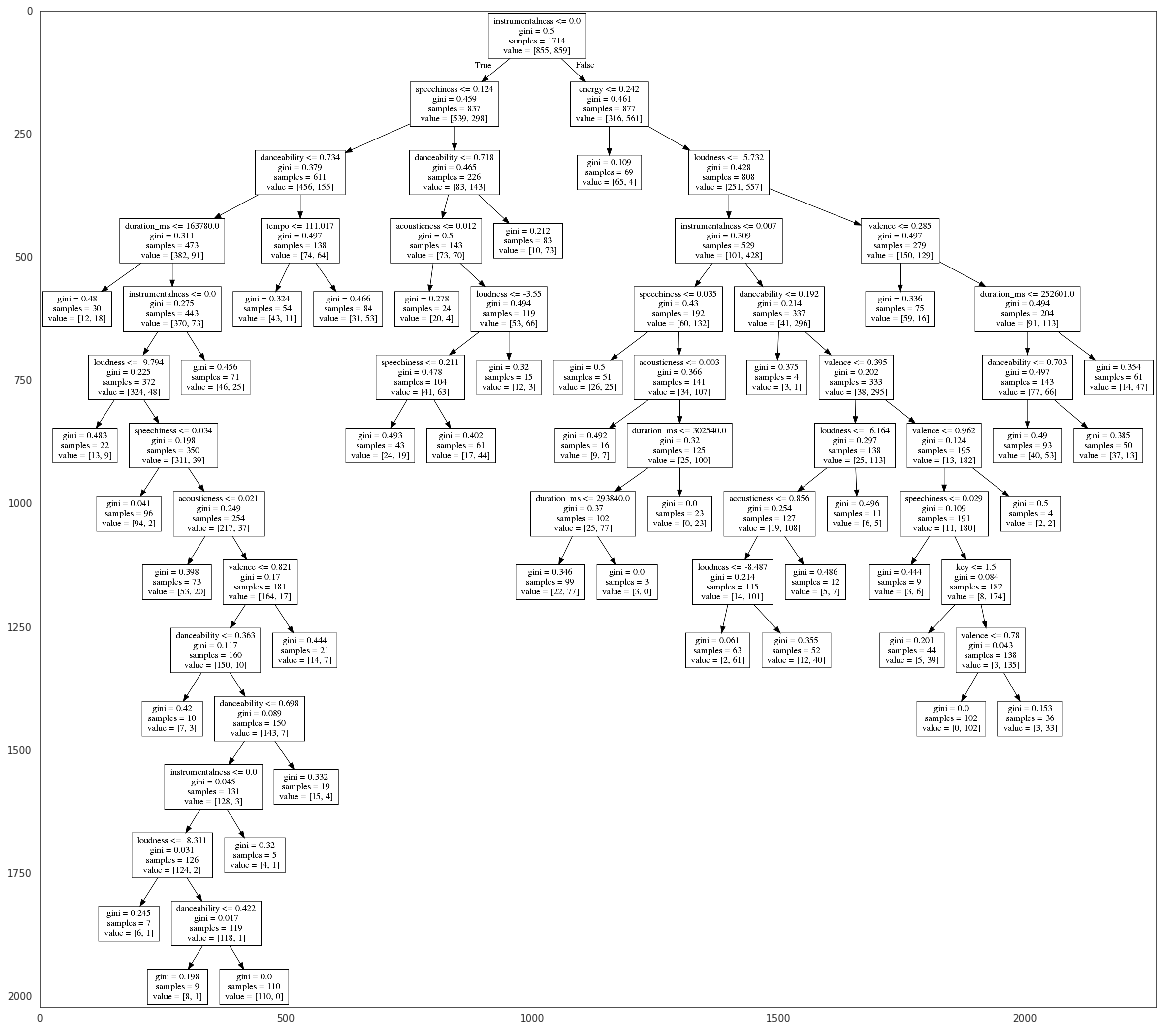

In [25]:
show_tree(df , names , 'tree1.png')